## Implementation of Voting classifier!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier

In [8]:
df = pd.read_csv(r'''C:\ml dl\voting\Iris.csv''')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df = df.iloc[:, 1:]
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [11]:
#Label encoder species
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder = LabelEncoder()

In [22]:
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


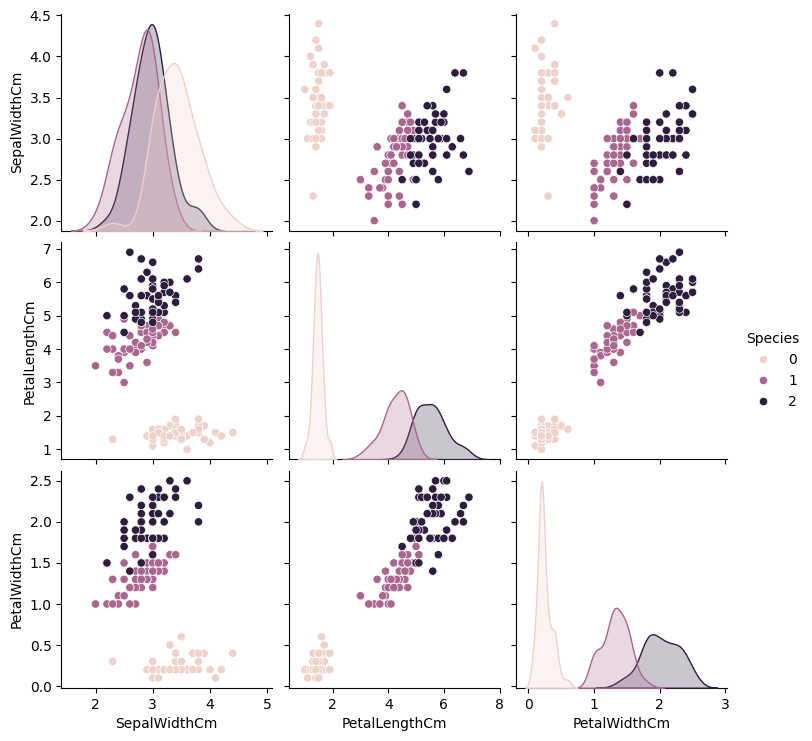

In [14]:
## get a pairplot
sns.pairplot(df, hue='Species')

In [21]:
new_df = df[df['Species'] != 0][['PetalLengthCm', 'SepalWidthCm', 'Species']]
new_df.head()

,PetalLengthCm,SepalWidthCm,Species
50,4.7,3.2,1
51,4.5,3.2,1
52,4.9,3.1,1
53,4.0,2.3,1
54,4.6,2.8,1


In [23]:
new_df.shape


(100, 3)

In [24]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [26]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()


In [27]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]


In [28]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))


lr 0.95
rf 0.95
knn 0.95


Hard Voting

In [29]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.95


Soft Voting

In [30]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.95


Weighted Voting

In [31]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))


for i=1,j=1,k=1 0.95
for i=1,j=1,k=2 0.95
for i=1,j=1,k=3 0.95
for i=1,j=2,k=1 0.95
for i=1,j=2,k=2 0.95
for i=1,j=2,k=3 0.95
for i=1,j=3,k=1 0.95
for i=1,j=3,k=2 0.95
for i=1,j=3,k=3 0.95
for i=2,j=1,k=1 0.95
for i=2,j=1,k=2 0.95
for i=2,j=1,k=3 0.95
for i=2,j=2,k=1 0.95
for i=2,j=2,k=2 0.95
for i=2,j=2,k=3 0.95
for i=2,j=3,k=1 0.95
for i=2,j=3,k=2 0.95
for i=2,j=3,k=3 0.95
for i=3,j=1,k=1 0.95
for i=3,j=1,k=2 0.95
for i=3,j=1,k=3 0.95
for i=3,j=2,k=1 0.95
for i=3,j=2,k=2 0.95
for i=3,j=2,k=3 0.95
for i=3,j=3,k=1 0.95
for i=3,j=3,k=2 0.95
for i=3,j=3,k=3 0.95


Classifiers of same Algo

In [33]:
from sklearn.svm import SVC


In [34]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))


svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [35]:
#HEre we can see svm3 -> highest 89%, but we can do better with voting classifier!!

In [36]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))


0.93
